In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')


In [2]:
import inventorize3

In [3]:
df=pd.read_csv('supplier_data.csv')

In [4]:
df.head()

,supplier,product,availability,no_suppliers,standard,price_fluctuation,Quantity,price
0,supplier1,product_1,0.0,0.5,0.0,0.5,710,360
1,supplier1,product_2,0.0,0.5,0.0,0.5,2997,2740
2,supplier1,product_3,0.0,0.5,0.0,0.5,3917,2919
3,supplier1,product_4,0.0,0.5,0.0,0.5,3827,3246
4,supplier1,product_5,0.0,0.5,0.0,0.0,3882,3596


In [13]:
df.shape

(24, 10)

In [5]:
df['risk_index']=df['availability']+df['no_suppliers']+ df['standard']+df['price_fluctuation']

In [6]:
df['value']= df['price']* df['Quantity']

In [7]:
df['value'].describe()

count    2.400000e+01
mean     5.064812e+06
std      4.847504e+06
min      1.189500e+05
25%      7.975622e+05
50%      3.011452e+06
75%      8.499426e+06
max      1.399081e+07
Name: value, dtype: float64

In [29]:
df['value'].describe()['50%']

np.float64(3011452.5)

In [10]:
def category(x,y):
    if( x>=3000000 and y>=1):
        return 'strategic'
    if( x>=3000000 and y<1):
        return 'leverage'
    if( x<3000000 and y<1):
        return 'critical'
    if( x<3000000 and y>=1):
        return 'routine'

In [24]:
cats=[]

for i in range(df.shape[0]):
    x=df.iloc[i]['value']
    y=df.iloc[i]['risk_index']
    cats.append(category(x,y))

In [23]:

df.iloc[1]['value']

np.int64(8211780)

In [26]:
df['category']=cats

In [27]:
df['category'].value_counts()

category
routine      10
strategic     8
leverage      4
critical      2
Name: count, dtype: int64

<Axes: xlabel='value', ylabel='risk_index'>

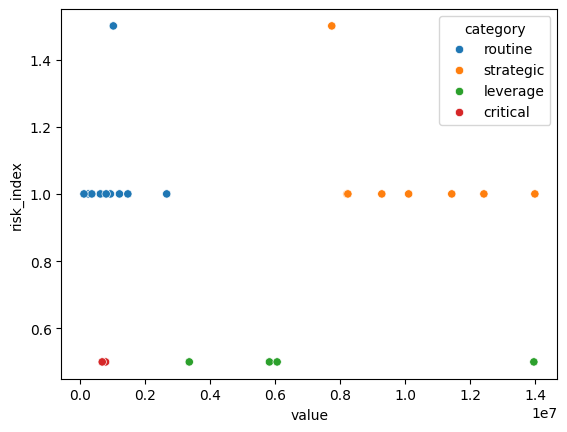

In [28]:
sns.scatterplot(x='value',y='risk_index',data=df,hue='category')